<div>
<img src='../../pics/banner.PNG'/>
</div>
<div>
<img width="15%" src='../../pics/tinlab.png'/>
<strong>Planets - Matplotlib - Jeroen Boogaard</strong>
</div>

<h1>Exploratory Data Analysis - Matplotlib</h1>

**Imports**

In [28]:
from pathlib import Path
from matplotlib import pyplot as plt
from IPython.display import clear_output
from numpy.polynomial.polynomial import polyfit
import numpy as np
import pandas as pd
import statistics as stats
import seaborn as sns

**Display configuration**

In [7]:
%matplotlib inline
pd.set_option("display.max.columns", None)

**Global variables**

In [8]:
csvFilePath = Path.cwd().parent.joinpath('csv')

### Data Collection

In [24]:
csvFile = csvFilePath.joinpath('berniw.f-speedway.5-laps.csv')
df = pd.read_csv(csvFile, sep=';', header=0, encoding='utf-8')
display(df.tail())

,time,pitch,distFromStart,rpm,angle,trackPos,distRaced,yaw,damage,curLapTime,fuel,roll,pitch.1,speedGlobalX,speedGlobalY,gear,wheelSpinVel,speedX,speedY,speedZ,racePos,lastLapTime,x,y,z,brake,accel,steer,gear.1,clutch,focus
183,2.778,-0.011467,5.566406,7164.458008,0.040944,0.273483,30.547913,-0.040944,3.0,2.776,17.671011,-0.273814,23.743750,-0.697010,2.0,"(66.883530,66.884155,73.908295,73.908295)",85.508562,0.991941,0.664092,1.0,0.0,683.964111,19.102247,0.387139,0.0,0.908080,0.012019,2.0,0.0,0.0,NaN
184,2.800,-0.011476,6.091614,7069.367188,0.040902,0.272456,31.073120,-0.040902,3.0,2.798,17.669832,-0.273781,23.978359,-0.703818,2.0,"(67.553734,67.546211,73.002647,73.002647)",86.353493,0.998775,0.673379,1.0,0.0,684.489319,19.086842,0.387105,0.0,1.000067,0.009785,2.0,0.0,0.0,NaN
185,2.822,-0.011450,6.621887,7313.753906,0.040822,0.271417,31.603394,-0.040822,3.0,2.820,17.668489,-0.273777,24.215183,-0.711669,2.0,"(68.198425,68.205322,75.532990,75.532990)",87.206589,0.998126,0.681941,1.0,0.0,685.019592,19.071251,0.386705,0.0,0.887170,0.012441,2.0,0.0,0.0,NaN
186,2.844,-0.011419,7.157410,7175.526367,0.040753,0.270369,32.138916,-0.040753,3.0,2.842,17.667313,-0.273697,24.448553,-0.717569,2.0,"(68.879272,68.863937,74.140762,74.140762)",88.046947,1.005666,0.688816,1.0,0.0,685.555115,19.055536,0.386758,0.0,1.000065,0.014402,2.0,0.0,0.0,NaN
187,2.866,-0.011365,7.697998,7450.575195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df.describe()

,time,pitch,distFromStart,rpm,angle,trackPos,distRaced,yaw,damage,curLapTime,fuel,roll,pitch.1,speedGlobalX,speedGlobalY,wheelSpinVel,speedX,speedY,speedZ,racePos,lastLapTime,x,y,z,brake,accel,steer,gear.1,clutch,focus
count,188.000000,188.000000,188.000000,188.000000,187.000000,187.000000,187.000000,187.000000,187.0,187.00000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.0,187.0,187.000000,187.000000,187.000000,187.0,187.000000,187.000000,187.000000,187.0,187.0,0.0
mean,0.917043,-0.010684,3370.877287,5979.383905,0.051054,0.324228,7.108203,-0.051052,3.0,0.90462,17.728533,-0.273489,8.222510,-0.255456,0.946524,29.610520,0.535489,0.239978,1.0,0.0,660.524886,19.864009,0.389174,0.0,0.899628,0.018828,1.219251,0.0,0.0,NaN
std,1.110496,0.005460,1029.706578,2863.628324,0.010909,0.021324,9.352693,0.010909,0.0,1.10422,0.028069,0.000484,8.147180,0.289079,0.693539,29.346487,0.322755,0.282795,0.0,0.0,9.352594,0.319958,0.001042,0.0,0.254624,0.019547,0.414850,0.0,0.0,NaN
min,-0.980000,-0.018822,0.131287,1570.796387,0.039260,0.270369,-0.003662,-0.068800,3.0,-0.98200,17.667313,-0.275364,-0.035052,-0.717569,0.000000,-0.166613,0.126644,-0.292027,1.0,0.0,653.413025,19.055536,0.386705,0.0,0.000000,-0.102116,1.000000,0.0,0.0,NaN
25%,-0.045000,-0.015554,3678.853027,3399.218384,0.041301,0.310583,0.000000,-0.063475,3.0,-0.05200,17.704974,-0.273755,-0.010675,-0.523273,0.000000,-0.043692,0.126644,-0.046842,1.0,0.0,653.416748,19.659394,0.388468,0.0,1.000000,-0.002298,1.000000,0.0,0.0,NaN
50%,0.914000,-0.011446,3679.363892,6077.819336,0.046144,0.337974,1.883057,-0.046142,3.0,0.90200,17.735706,-0.273541,6.148386,-0.246974,1.000000,22.145756,0.606979,0.243755,1.0,0.0,655.299866,20.070240,0.389102,0.0,1.000000,0.014402,1.000000,0.0,0.0,NaN
75%,1.851000,-0.003938,3686.803955,9140.069580,0.063477,0.339072,12.304443,-0.041299,3.0,1.83400,17.744222,-0.273194,16.079855,0.035649,1.000000,57.908661,0.801718,0.491757,1.0,0.0,665.721252,20.086702,0.390256,0.0,1.000064,0.037059,1.000000,0.0,0.0,NaN
max,2.866000,-0.002863,3703.502197,9761.133789,0.068802,0.342998,32.138916,-0.039259,3.0,2.84200,17.778404,-0.272060,24.448553,0.266942,2.000000,88.046947,1.033745,0.688816,1.0,0.0,685.555115,20.145594,0.391405,0.0,1.000355,0.050676,2.000000,0.0,0.0,NaN


## 

In [30]:
# sns.heatmap(df)

### Data Visualisation

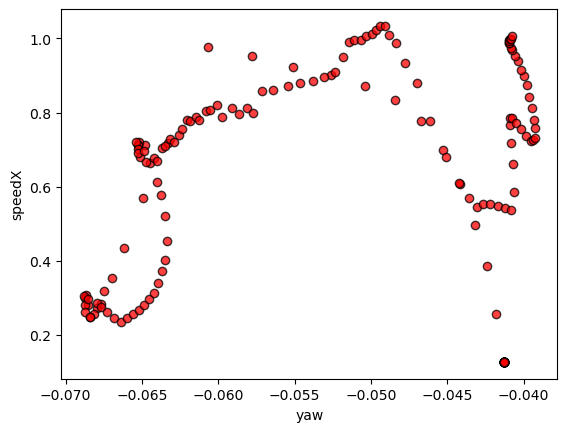

In [26]:
xLabel = "yaw" 
yLabel = "speedX"
x = df[xLabel]
y = df[yLabel]
plt.xlabel(xLabel)
plt.ylabel(yLabel)
plt.scatter(x, y, c="red", edgecolor='black', linewidth=1, alpha=0.75)

**Is er een lineair verband tussen de omvang en de zwaartekracht van een planeet?**

In [ ]:
plt.xlabel(xLabel)
plt.ylabel(yLabel)
plt.title(f'Relatie tussen {xLabel} en {yLabel}')
plt.scatter(x, y, c="red", edgecolor='black', linewidth=1, alpha=0.75)

b, m = polyfit(x, y, 1)
plt.plot(x, b + m * x, '-')

<img width="30%" src='../pics/pluto.jpg'/>

In [ ]:
planetTypeList = ["Terrestrial", "Terrestrial", "Terrestrial", "Terrestrial",  "Gas Giants", "Gas Giants", "Ice Giants", "Ice Giants", "Dwarf" ]